In [7]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
m = pd.read_csv('gene_com_mat_textmining.csv',sep='\t')
m

,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,...,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12
2897,3,19,22,44,62,105,100,107,31,145,...,58,72,193,105,231,162,351,495,93,197
2899,3,19,22,44,62,105,100,107,31,145,...,58,72,193,105,231,162,351,495,93,197
2900,3,19,22,44,62,105,100,107,31,145,...,58,72,193,105,231,162,351,495,93,197
2901,3,19,22,44,62,105,100,107,31,145,...,58,72,193,105,231,162,351,495,93,197
2898,3,19,22,44,62,105,100,107,31,145,...,58,72,193,105,231,162,351,495,93,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,34,25,32,34,102,102,128,47,48,109,...,202,102,179,189,13,440,473,345,546,577
4233,34,37,48,58,102,115,123,157,146,168,...,35,79,54,59,192,207,498,108,287,397
6812,35,38,50,60,104,117,144,153,168,192,...,346,369,383,413,447,467,27,280,128,145
2558,35,38,50,60,104,117,144,153,168,192,...,346,369,383,413,447,467,27,543,831,860


In [3]:
def comm(gamma):
    lst = []
    for j in m[gamma].unique():
        l = sorted(list(m[gamma][m[gamma]==j].index))
        lst.append(l)
    return(lst)

lst = []
comm_lst = []
for gamma in m.columns:
    comms = comm(gamma)
    lst.append(comms)
    for i in comms:
        if i not in comm_lst:
            comm_lst.append(i)

res = defaultdict(list)
for i in range(len(comm_lst)):
    for j in range(len(lst)):
        if comm_lst[i] in lst[j]:
            res[i].append(1)
        else:
            res[i].append(0)
            
df = pd.DataFrame.from_dict(res).transpose()
df.columns = m.columns
df

,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,...,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1,0,0,0,1,0,0,0,...,1,1,0,1,1,0,1,1,0,0
2,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
def comm_dyn(idx):
    step = ''
    memory = []
    trajct = df.loc[idx]
    for i in range(len(trajct)):
        if i == 0:
            step = 'birth' if trajct[i]==1 else 'dead'     
        else:
            if trajct[i-1]==1:
                step = 'alive' if trajct[i]==1 else 'killed'
            else:
                if 'birth' in memory:
                    step = 'resurged' if trajct[i]==1 else 'dead'
                else:
                    step = 'birth' if trajct[i]==1 else 'dead'
        memory.append(step)

    cnt = Counter(memory)
    return([cnt['birth'],cnt['killed'],cnt['resurged']])

data = [ comm_dyn(idx) for idx in range(len(df.index))]
dff = pd.DataFrame.from_records(data)
dff.columns = ['birth','death','resurgence']
dff = pd.DataFrame({'lab':['Birth', 'Death', 'Resurgence'], 'val':[dff['birth'].sum(), dff['death'].sum(), dff['resurgence'].sum()]})

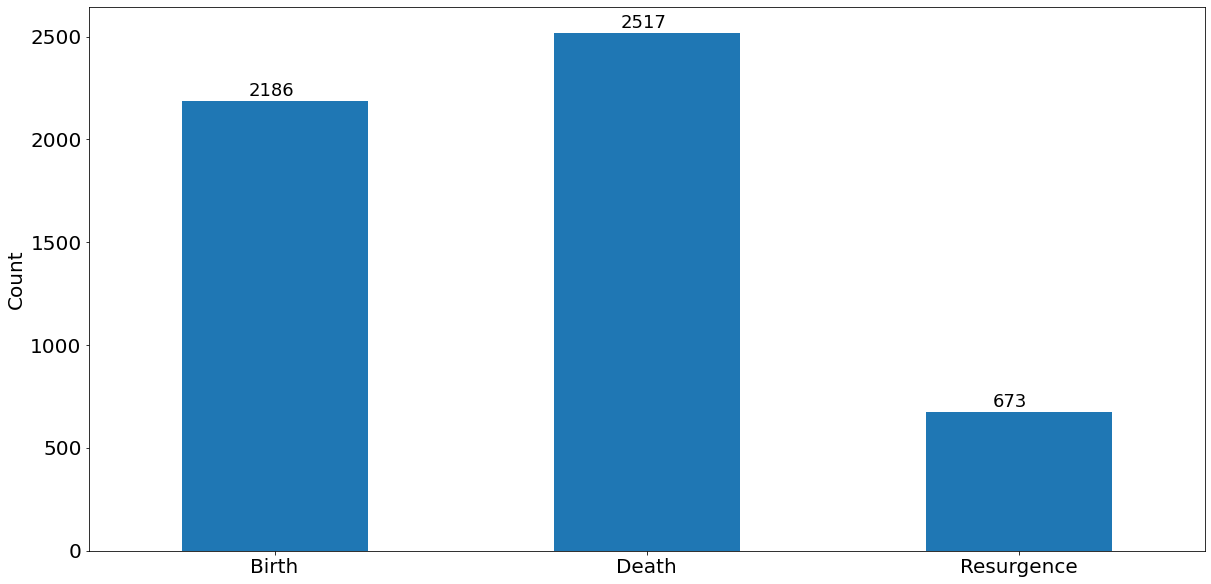

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
ax = dff.plot.bar(x='lab', y='val', rot=0, legend=False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.18 * 1.005, p.get_height()+25 * 1.005), size=18)
ax.set_xlabel("")
ax.set_ylabel("Count", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('dynamic_events.png')
plt.show()